# Training and Evaluating CNN Model with Data Augmentation

In this notebook, we will build a CNN model to classify images into different classes. We will use data augmentation to improve generalization and analyze the training performance using accuracy and loss plots.

## Step 1: Import Required Libraries

In [1]:

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import shutil
    

## Step 2: Define Paths and Split Dataset into Training and Validation Sets

In [2]:

# Define main dataset path and directories for train and validation splits
dataset_dir = 'E:\Capstone Track\Object Detection\CNN\Dataset'
train_dir = 'E:\Capstone Track\Object Detection\CNN\\train_dir'
val_dir = 'E:\Capstone Track\Object Detection\CNN\\val_dir'

# Create train and validation directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Loop through all classes and split images into train and validation folders
class_names = os.listdir(dataset_dir)

for class_name in class_names:
    class_path = os.path.join(dataset_dir, class_name)
    images = os.listdir(class_path)
    
    # Split data (80% train, 20% validation)
    train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)
    
    # Create subdirectories for each class
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
    
    # Move images
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))
    for img in val_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))
        
print("Dataset has been split into train and validation sets.")
    

Dataset has been split into train and validation sets.


## Step 3: Define Data Augmentation Layers

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Menggunakan ImageDataGenerator untuk augmentasi data dan normalisasi
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalisasi nilai pixel
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Hanya normalisasi untuk validasi

# Memuat gambar dari direktori dan membuat generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
print("Data augmentation layers created.")
    

Found 7549 images belonging to 10 classes.
Found 1893 images belonging to 10 classes.
Data augmentation layers created.


## Step 4: Build the CNN Model with Data Augmentation

In [4]:

# Define CNN model architecture with augmentation layers
model = models.Sequential([
    tf.keras.Input(shape=(150, 150, 3)),
    # Rescale the image. Note the input shape is the desired size of the image: 150x150 with 3 bytes for color
    tf.keras.layers.Rescaling(1./255),
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
    

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,477,066 (13.26 MB)

 Trainable params: 3,477,066 (13.26 MB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Prepare the Training and Validation Data

In [5]:

# Load the training and validation datasets using image_dataset_from_directory
TRAINING_DIR = train_dir
VALIDATION_DIR = val_dir

train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAINING_DIR,
    image_size=(150, 150),
    batch_size=32,
    label_mode='categorical'
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    VALIDATION_DIR,
    image_size=(150, 150),
    batch_size=32,
    label_mode='categorical'
)

# Optimize datasets for training
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = train_dataset.cache().shuffle(SHUFFLE_BUFFER_SIZE).prefetch(PREFETCH_BUFFER_SIZE)
validation_dataset_final = validation_dataset.cache().prefetch(PREFETCH_BUFFER_SIZE)
    

Found 7549 files belonging to 10 classes.
Found 1893 files belonging to 10 classes.


## Step 6: Train the Model

In [6]:
import tensorflow as tf

class StopAtAccuracy(tf.keras.callbacks.Callback):
    def __init__(self, target_accuracy=0.95):
        super(StopAtAccuracy, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs.get("accuracy")
        if accuracy is not None and accuracy >= self.target_accuracy:
            print(f"\nTarget accuracy of {self.target_accuracy * 100}% reached. Stopping training.")
            self.model.stop_training = True

# Menggunakan callback kustom saat melatih model
stop_at_accuracy = StopAtAccuracy(target_accuracy=0.95)

history = model.fit(
    train_dataset_final,
    epochs=25,
    validation_data=validation_dataset_final,
    callbacks=[stop_at_accuracy]  # Menambahkan callback kustom ke dalam proses training
)


Epoch 1/25
236/236 ━━━━━━━━━━━━━━━━━━━━ 98s 345ms/step - accuracy: 0.4584 - loss: 1.4160 - val_accuracy: 0.8114 - val_loss: 0.4612
Epoch 2/25
236/236 ━━━━━━━━━━━━━━━━━━━━ 65s 277ms/step - accuracy: 0.7812 - loss: 0.5504 - val_accuracy: 0.8304 - val_loss: 0.3893
Epoch 3/25
236/236 ━━━━━━━━━━━━━━━━━━━━ 65s 277ms/step - accuracy: 0.7489 - loss: 0.6688 - val_accuracy: 0.8611 - val_loss: 0.3834
Epoch 4/25
236/236 ━━━━━━━━━━━━━━━━━━━━ 64s 273ms/step - accuracy: 0.8299 - loss: 0.4314 - val_accuracy: 0.8558 - val_loss: 0.3468
Epoch 5/25
236/236 ━━━━━━━━━━━━━━━━━━━━ 64s 271ms/step - accuracy: 0.8559 - loss: 0.3731 - val_accuracy: 0.8405 - val_loss: 0.3932
Epoch 6/25
236/236 ━━━━━━━━━━━━━━━━━━━━ 65s 275ms/step - accuracy: 0.8662 - loss: 0.3548 - val_accuracy: 0.8870 - val_loss: 0.2814
Epoch 7/25
236/236 ━━━━━━━━━━━━━━━━━━━━ 59s 250ms/step - accuracy: 0.8902 - loss: 0.2866 - val_accuracy: 0.9049 - val_loss: 0.2549
Epoch 8/25
236/236 ━━━━━━━━━━━━━━━━━━━━ 64s 273ms/step - accuracy: 0.8911 - loss: 0

## Step 7: Evaluate the Model and Plot Results

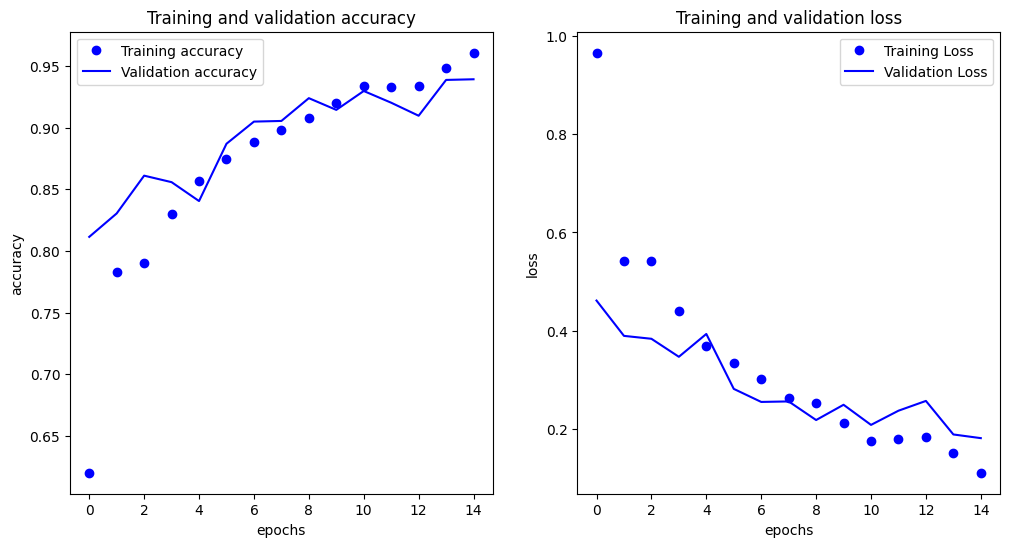

In [7]:

# Define function to plot training and validation accuracy and loss
def plot_loss_acc(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()

    ax[1].plot(epochs, loss, 'bo', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Training and validation loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()

    plt.show()

# Plot accuracy and loss
plot_loss_acc(history)
    

In [ ]:
directory_path = "E:\Capstone Track\Object Detection\ModelSave"
model_name = "my_model.h5"

model.save(os.path.join(directory_path, model_name))

### PREDICTION